# Homework 1 - data validation & cleaning (deadline 29. 10. 2023, 23:59)

In short, the main task is to clean The Metropolitan Museum of Art Open Access dataset.
  
> The instructions are not given in detail: It is up to you to come up with ideas on how to fulfill the particular tasks as best as possible!

However, we **strongly recommend and require** the following:
* Follow the assignment step by step. Number each step.
* Most steps contain the number of features that should be treated. You can preprocess more features. However, it does not mean the teacher will give you more points. Focus on quality, not quantity.
* Properly comment on all your steps. Use Markdown cells and visualizations. Comments are evaluated for 2 points of the total, together with the final presentation of the solution. However, it is not desirable to write novels! 
* This task is timewise and computationally intensive. Do not leave it to the last minute.
* Hand in a notebook that has already been run (i.e., do not delete outputs before handing in).

## What are you supposed to do:

  1. Download the dataset MetObjects.csv from the repository https://github.com/metmuseum/openaccess/.
  1. Check consistency (i.e., that the same things are represented in the same way) of at least **three features** where you expect problems (including the "Object Name" feature). You can propose how to clean the selected features. However, **do not apply cleaning** (in your interest) 🙂 _(1.5 points)_
  1. Select at least **two features** (i.e., one couple) where you expect integrity problems (describe your choice) and check the integrity of those features. By integrity, we mean correct logical relations between features (e.g., female names for females only). _(2 points)_
  1. Convert at least **five features** to a proper data type. Choose at least one numeric, one categorical (i.e., ordinal or nominal), and one datetime. _(1.5 points)_
  1. Find some outliers and describe your method. _(3 points, depends on creativity)_
  1. Detect missing data in at least **three features**, convert them to a proper representation (if they are already not), and impute missing values in at least **one feature** using some imputation method (i.e., imputation by mean or median is too trivial to obtain any points). _(2 + 3 points, depends on creativity)_
  1. Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later. _(3 points)_
  1. Focus on the extraction of the physical dimensions of each item (width, depth, and height in centimeters) from the "Dimensions" feature. _(2 points)_
  
All your steps, your choices of methods, and the following code **must be commented on!** For text comments (discussion, etc., not code comments), use **Markdown cells**. Comments are evaluated for 2 points together with the final presentation of the solution. 

**If you do all this properly, you will obtain 20 points.**

## Comments

  * Please follow the technical instructions from https://courses.fit.cvut.cz/NI-PDD/homeworks/index.html.
  * Methods that are more complex and were not shown during the tutorials are considered more creative and should be described in detail.
  * English is not compulsory.

In [1]:
import pandas as pd
import numpy as np
from sklearn.neighbors import LocalOutlierFactor
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer

In [2]:
# read dataset
df = pd.read_csv('./MetObjects.csv', low_memory=False)
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', None)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 54 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Object Number            484956 non-null  object 
 1   Is Highlight             484956 non-null  bool   
 2   Is Timeline Work         484956 non-null  bool   
 3   Is Public Domain         484956 non-null  bool   
 4   Object ID                484956 non-null  int64  
 5   Gallery Number           49541 non-null   object 
 6   Department               484956 non-null  object 
 7   AccessionYear            481094 non-null  object 
 8   Object Name              482690 non-null  object 
 9   Title                    456153 non-null  object 
 10  Culture                  208190 non-null  object 
 11  Period                   91143 non-null   object 
 12  Dynasty                  23201 non-null   object 
 13  Reign                    11236 non-null   object 
 14  Port

# Task 2

## Check consistency

**1. Object Name**
As list shows this feature is incosistent because includes same labels with words in high/low case, for example: "Basin Stand" and "Basin stand". Also there are same things with different naming, for example "Drawing Ornament & Architecture" and "Drawing ; Ornament and Architecture". Furthemore, there are fileds with numbers, describing nothing or even HTML tags \<i\>Top\</i\>

**2. Object Date**
One more incosistent feature with different date styles. When we will go to the end of the lables list we can see a lot of date formats, for example: "1909–27", "ca. 1887", "late 20th, early 21st century", "fall/winter 1959 couture"

**3. City**
The third incosistent value I chose is City. I was interested to print the shortest titles and realised that some of them aren't exist. For example: Bu, Kus. Also I printed the longest city's length and realised that most of them are discribing location or region but not city's name. 

One of the approaches how to clean incosistency could be dictionary creation for categorical variables. For example let's take object with name "Building" and then we will rename all it's derivatives to the name "Building".
For dates would be good to create date standard. 

In [4]:
# print incosistent values in Object Name column
print(*df['Object Name'].unique().tolist()[52:54], sep = "\n")
print(*df['Object Name'].unique().tolist()[-17], sep = '')

Basin Stand
Basin stand
Helmet (<i>Top</i>)


In [5]:
## print incosistent values in Object Date column
print(*df['Object Date'].unique().tolist()[2], sep = "")
print(*df['Object Date'].unique().tolist()[19], sep = "")
print(*df['Object Date'].unique().tolist()[-75], sep = "")
print(*df['Object Date'].unique().tolist()[-82], sep = "")

1909–27
ca. 1887
late 20th, early 21st century
fall/winter 1959 couture


In [6]:
## print incosistent values in City column
df_without_nan = df[df['City'].notna()]
sorted_indices = df_without_nan.iloc[df_without_nan['City'].str.len().argsort()[:10]]
print(sorted_indices['City'])
sorted_indices = df_without_nan.iloc[df_without_nan['City'].str.len().argsort()[-10:]]
print(sorted_indices['City'])

188573     Bu
188435     Bu
188436     Bu
188323     Bu
188324     Bu
188325     Bu
188514     Bu
188408     Bu
188409     Bu
123       Rye
Name: City, dtype: object
366876        Boston: Isaiah Thomas and Ebenezer T. Andrews
336094        La Chaux-du-Milieu (near Le Locle, Neuchatel)
366836       Venice: Apud Francifcum de Francifcis Senenfem
366843       Amsterdam: Apud Joannem Janssonium a Waesberge
315611      Port Saint Symeon (now al-Mina/Samandag,Turkey)
366880     Berlin: Ernst Steiniger Druck-und Verlagsanstalt
337580     Society Islands, Leeward Islands: Fetuna, Raiate
29627     possibly Valencia|possibly Toledo|possibly Madrid
218786    II) Paris: Jte. Bourmancé|I) Paris: Rittner & ...
366877    Vols. 1 (November 1912)–7 (September 1925)|cop...
Name: City, dtype: object


# Task 3
## Integrity problems

Incompatibility with **Artist End Date** and **Object Begin Date** columns. There are objects where object's begin date is older than artist's end date. Artist couldn't do his art while he has already finished his activity. For example row id=1 Christian Gobrecht has object's date 1901 while artist's end date is 1844.  

Also I investigated one more incompatibility in **Artist End Date** and **Artist Display Name** columns. For example for **William Adams** artist's name, there are 3 'Artist End Date' : [1865, 1861] . But then I took a look on nationality and artist's bio and realised that they are different people working at the same period of time. 

In [7]:
# display incompatibility in Aritst End Date and Object Begin Date 
display(df[df['Object Begin Date'].notna() & df['Artist End Date'].notna()][['Artist Display Name', 'Object Begin Date', 'Artist End Date']])

Artist Display Name  Object Begin Date Artist End Date
0        James Barton Longacre               1853      1869      
1           Christian Gobrecht               1901      1844      
9              Bela Lyon Pratt               1912      1917      
10          Christian Gobrecht               1907      1844      
11       James Barton Longacre               1876      1869      
...                        ...                ...             ...
484951        Douglas Gorsline               1939      1985      
484952        Douglas Gorsline               1939      1985      
484953  Edmond Mario Granville               1920      1969      
484954  Michel Eugène Chevreul               1839      1889      
484955        Frank M. Gregory               1887      1948      

[282513 rows x 3 columns]

In [8]:
display(df[df['Artist Display Name'] == 'William Adams'][['Artist End Date', 'Artist Nationality', 'Artist Display Bio']])

Artist End Date Artist Nationality  \
6733        1861                 American   
101818      1805                            
102748      1865                  British   
102749      1865                  British   
103977      1865                  British   
103994      1865                  British   
107920      1805                            

                                  Artist Display Bio  
6733                                   ca. 1801–1861  
101818                   1745–1805, active 1780–1804  
102748  British, Greenfield, Staffordshire 1798–1865  
102749  British, Greenfield, Staffordshire 1798–1865  
103977  British, Greenfield, Staffordshire 1798–1865  
103994  British, Greenfield, Staffordshire 1798–1865  
107920                   1745–1805, active 1780–1804

# Task 4

## Convert features to a proper data type

In [9]:
# convert Department as categorical variable type 
df['Culture'] = df['Culture'].astype('category')

In [10]:
# convert Accession Year as datetime variable type, invalid parsing will be set as NaN.
df['AccessionYear'] = pd.to_datetime(df['AccessionYear'], format='%Y', errors='coerce')

In [11]:
# convert Object Begin Date as numeric variable type
df['Object Begin Date'] = pd.to_numeric(df['Object Begin Date'])

In [12]:
# convert Object End Date as numeric variable type
df['Object End Date'] = pd.to_numeric(df['Object End Date'])

In [13]:
# convert City as string variable type
df['City'] = df['City'].astype(str)

# Task 5
## Find some outliers

To find outliers I used method called Local Outlier Factor. It calculates local density between object and it's k-neighbours. Amount of neighbours I chose 20.  

In [14]:
# calculate LOF
clf = LocalOutlierFactor(n_neighbors=20)
fit_data = np.array(df[['Object Begin Date', 'Object End Date']])
clf.fit_predict(fit_data)
results = clf.negative_outlier_factor_

In [15]:
# print rows with the highest LOF scores
df["LOF"] = results
df.sort_values("LOF")[0:5]

Object Number  Is Highlight  Is Timeline Work  Is Public Domain  \
45677   2015.300.258         False             False              True   
38250    1994.605.95         False             False              True   
38247    1994.605.92         False             False              True   
198884     53.151.21         False             False              True   
198887     53.151.24         False             False              True   

        Object ID Gallery Number                Department AccessionYear  \
45677       53154            NaN                 Asian Art    2015-01-01   
38250       44395            NaN                 Asian Art    1994-01-01   
38247       44392            NaN                 Asian Art    1994-01-01   
198884     324284            NaN  Ancient Near Eastern Art    1953-01-01   
198887     324287            NaN  Ancient Near Eastern Art    1953-01-01   

        Object Name                                           Title   Culture  \
45677          Bowl  火焔土器|“Flame-Rimmed” Cooking Vessel (Kaen doki)     Japan   
38250   Belt buckle                                             NaN     China   
38247        Figure                                             NaN     China   
198884    Microlith                                       Microlith  Natufian   
198887    Microlith                                       Microlith  Natufian   

                                              Period Dynasty Reign Portfolio  \
45677    Jomon period (ca. 10,500 B.C.–ca. 300 B.C.)     NaN   NaN       NaN   
38250   Neolithic period to Ming dynasty (1368–1644)     NaN   NaN       NaN   
38247   Neolithic period to Ming dynasty (1368–1644)     NaN   NaN       NaN   
198884                                      Natufian     NaN   NaN       NaN   
198887                                      Natufian     NaN   NaN       NaN   

       Constituent ID Artist Role Artist Prefix Artist Display Name  \
45677             NaN         NaN           NaN                 NaN   
38250             NaN         NaN           NaN                 NaN   
38247             NaN         NaN           NaN                 NaN   
198884            NaN         NaN           NaN                 NaN   
198887            NaN         NaN           NaN                 NaN   

       Artist Display Bio Artist Suffix Artist Alpha Sort Artist Nationality  \
45677                 NaN           NaN               NaN                NaN   
38250                 NaN           NaN               NaN                NaN   
38247                 NaN           NaN               NaN                NaN   
198884                NaN           NaN               NaN                NaN   
198887                NaN           NaN               NaN                NaN   

       Artist Begin Date Artist End Date Artist Gender Artist ULAN URL  \
45677                NaN             NaN           NaN             NaN   
38250                NaN             NaN           NaN             NaN   
38247                NaN             NaN           NaN             NaN   
198884               NaN             NaN           NaN             NaN   
198887               NaN             NaN           NaN             NaN   

       Artist Wikidata URL          Object Date  Object Begin Date  \
45677                  NaN                  NaN             -11000   
38250                  NaN                  NaN             -10000   
38247                  NaN                  NaN             -10000   
198884                 NaN  ca. 11,000–9300 BCE             -11000   
198887                 NaN  ca. 11,000–9300 BCE             -11000   

        Object End Date                             Medium  \
45677                 0                        Earthenware   
38250              1644                             Bronze   
38247              1644  Earthenware with green lead glaze   
198884            -9300                              Flint   
198887            -9300                              

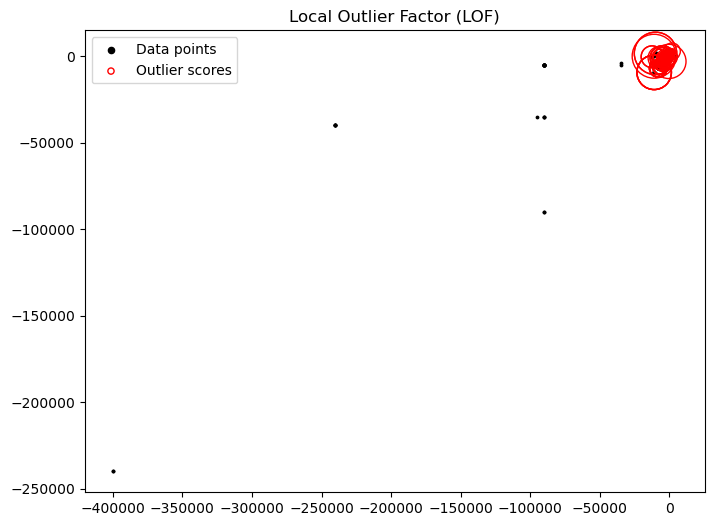

In [16]:
# plot settigs has been taken from https://scikit-learn.org/stable/auto_examples/neighbors/plot_lof_outlier_detection.html
plt.figure(figsize=(8, 6))
plt.title('Local Outlier Factor (LOF)')
plt.scatter(fit_data[:, 0], fit_data[:, 1], color="k", s=3.0, label="Data points")
# plot circles with radius proportional to the outlier scores
radius = (results.max() - results) / (results.max() - results.min())
scatter = plt.scatter(
    fit_data[:, 0],
    fit_data[:, 1],
    s=1000 * radius,
    edgecolors="r",
    facecolors="none",
    label="Outlier scores"
)
lgnd = plt.legend(["Data points", "Outlier scores"])
lgnd.legend_handles[0]._sizes = [20]
lgnd.legend_handles[1]._sizes = [20]

plt.show()

# Task 6
## Detect missing data and impute missing values

I have chosen to impute missing values to the **Gallery Number** column and used KNN algorithm to do this.

In [17]:
# Detecting missing data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484956 entries, 0 to 484955
Data columns (total 55 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Object Number            484956 non-null  object        
 1   Is Highlight             484956 non-null  bool          
 2   Is Timeline Work         484956 non-null  bool          
 3   Is Public Domain         484956 non-null  bool          
 4   Object ID                484956 non-null  int64         
 5   Gallery Number           49541 non-null   object        
 6   Department               484956 non-null  object        
 7   AccessionYear            481054 non-null  datetime64[ns]
 8   Object Name              482690 non-null  object        
 9   Title                    456153 non-null  object        
 10  Culture                  208190 non-null  category      
 11  Period                   91143 non-null   object        
 12  Dynasty         

In [18]:
# convert Gallery Number column to the int representation
idx=1000
type_to_int_mapping = dict()
for index, type_str in enumerate(df[~df['Gallery Number'].isnull()]['Gallery Number'], 1):
    try:
        type_to_int_mapping[type_str] = int(type_str)
    except (ValueError, TypeError):
        if type_to_int_mapping.get(type_str) != None:
            continue
        type_to_int_mapping[type_str] = idx
        idx+=1
        pass

df['Gallery Number'] = df['Gallery Number'].map(type_to_int_mapping)
df['Gallery Number'] = df['Gallery Number'].astype('Int64')
display(df['Gallery Number'].head())

0    <NA>
1    <NA>
2    <NA>
3    <NA>
4    <NA>
Name: Gallery Number, dtype: Int64

In [19]:
chosen_columns = ['Object Begin Date', 'Object End Date']
data = df.loc[:, chosen_columns].copy()

In [20]:
from sklearn.neighbors import NearestNeighbors # unsupervised learner for implementing neighbor searches

# X - points where we know Gallery Number

X = data[~df['Gallery Number'].isnull()].values
# their indices
Xidx = data[~df['Gallery Number'].isnull()].index # index tell us where are existing values

# Y - points where the Gallery Number should be imputed
Y = data[df['Gallery Number'].isnull()].values

Yidx = data[df['Gallery Number'].isnull()].index
# training with 20 neighbours
neighbors = NearestNeighbors(n_neighbors=20)
neighbors.fit(X)

# get 20 neighbors for each point
Yn = neighbors.kneighbors(Y, return_distance=False)

# Prepare a new variable
df['KNN'] = df['Gallery Number'] # with origin values

# Imputation
for i in range(Yn.shape[0]):
    g_type = [df['KNN'][Xidx[idx]] for idx in Yn[i,:]]
    df.loc[Yidx[i], 'KNN'] = g_type[np.argmax(g_type)]
    

In [21]:
df['KNN'].head()
# Reverse the mapping
int_to_type_mapping = {v: k for k, v in type_to_int_mapping.items()}

# Assuming df is your DataFrame with the 'Gallery Number' column containing integers
df['KNN'] = df['KNN'].map(int_to_type_mapping)
df['KNN'].head()

0                801
1                774
2    Petrie Ct. Café
3    Petrie Ct. Café
4    Petrie Ct. Café
Name: KNN, dtype: object

# Task 7
## Focus more precisely on cleaning the "Medium" feature. As if you were to use it in the KNN classification algorithm later.

First of all I decided to remove all special characters, parentheses etc. to have more consistent values. Then calculated how many unique strings(categories) I have. Then I decided to aggregate substrings and strings which have Levenshtein distance less than 10 to decrease amount of categories. After this I replace all similar strings on  first elment in their array of similar strings. That helped me to decrease amount of categories on ~10000.

In [22]:
# Define the patterns to remove
patterns_to_remove = r'(\r\n|\(.*\)|<i><\/i>|\x08|\r\n\t|\?)|(\b[ a-z]\))|(\d\))|,|-|;|\.|:|®|&'
# Apply the regex to the 'Medium' column to remove the patterns
df['Medium'] = df['Medium'].str.replace(patterns_to_remove, '', regex=True)
df['Medium'] = df[~df['Medium'].isnull()]['Medium']
df['Medium'] = df['Medium'].str.lower()
df['Medium'] = df['Medium'].str.strip()
df['Medium'] = df['Medium'].str.replace(r'\s+', ' ', regex=True)
nan_amount = df['Medium'].isna().sum()
unique_amount = len(df[~df['Medium'].isnull()]['Medium'].unique())
print(f'Total amount of nan Medium rows: {nan_amount}')
print(f'Total number of unique rows in Medium column: {unique_amount}')

Total amount of nan Medium rows: 7215
Total number of unique rows in Medium column: 57003


In [23]:
import Levenshtein
similarity_threshold = 10

# Create a dictionary to store similar strings
similar_arrays = []
strings = df[~df['Medium'].isnull()]['Medium'].unique()
similar_arrays.append([strings[0]])

# for each unique row define array of similar row values
for i in range(1, len(strings)):
    current_string = strings[i]
    flag = False
    
    # iterate through arrays of similar strings, define if the current string is substring of first value is the list
    # calculate Levenshtein distance and assign current string to the array of similar strings
    for k in range(len(similar_arrays)):
        
        if similar_arrays[k][0] in current_string:
            distance = Levenshtein.distance(current_string, similar_arrays[k][0])
            if distance <= similarity_threshold:
                similar_arrays[k].append(current_string)
                flag = True
                break
        
            
    # Initialize a list to store similar strings
    if not flag:
        similar_arrays.append([current_string])

In [24]:
# define helper function to substitute string on it's similar in similar arrays
def subsitute_similar(medium):
    for i in range(len(similar_arrays)):
        if medium in similar_arrays[i]:
            return similar_arrays[i][0]

In [149]:
similar_arrays[0]

['gold',
 'hair gold',
 'gold pearl',
 'pearls gold',
 'sardonyx gold',
 'gold coral',
 'gold diamonds',
 'gold enamel',
 'gold garnet',
 'ivory gold',
 'gold carnelian',
 'onyx gold',
 'silver gold',
 'wood gold leaf',
 'ivory and gold',
 'gold hair',
 'shell gold',
 'gold garnets',
 'coral and gold',
 'gold and coral',
 'oak and gold',
 'brass gold',
 'iron gold wood',
 'steel gold',
 'leather gold',
 'iron gold',
 'bronze gold',
 'iron gold tin',
 'gold steel',
 'silk gold',
 'lacquer gold',
 'whalebone gold',
 'wood gold',
 'gold silver',
 'copper gold',
 'gold copper',
 'iron wood gold',
 'textile gold',
 'iron gold foil',
 'jade gold',
 'crystal gold',
 'gold stones',
 'gold horn',
 'wood horn gold',
 'jade ruby gold',
 'horn gold',
 'gold brass',
 'jade gold ruby',
 'iron gold silk',
 'gold sheet',
 'gold and glass',
 'gold pearls',
 'gold glass',
 'jade and gold',
 'iron and gold',
 'gold with bead',
 'gold and lapis',
 'gold and stone',
 'gold lacquer',
 'gold plated',
 'gold 

In [25]:
# substitute values by similar to them
df['Medium'] = df[~df['Medium'].isnull()]['Medium'].apply(subsitute_similar)

In [152]:
# print number of unique rows
len(df['Medium'].unique())

47631